In [273]:
#import standard data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [274]:
df_pitching = pd.read_csv('pitcher_features.csv')

In [275]:
df_pitching.head()

,Unnamed: 0,total_bf,age,years_after_28,primary_position,throws,sp_pct_,total_bf_,sp_pct,whip_reg,...,fly_balls_ratio_pitcher_reg,ground_balls_ratio_pitcher_reg,line_drives_ratio_pitcher_reg,popups_ratio_pitcher_reg,hr_fb_pct_pitcher_reg,avg_bf_per_outing_reg,pitcher_avg_xwoba_reg,pitcher_avg_woba_reg,zone_chase_pct_reg,avg_fb_vel_reg
0,0,0.0,23.0,0.0,reliever,R,0.000000,56.250,2.883527,1.634001,...,1.194588,1.344661,1.177892,1.049938,0.207623,3.706988,0.390563,0.355679,0.616499,92.973393
1,1,218.0,29.0,1.0,reliever,L,0.000000,26.625,2.883527,1.148660,...,1.305724,1.667525,1.273387,0.254821,0.219309,2.875195,0.349642,0.292201,0.627072,93.001101
2,2,809.0,29.0,1.0,starter,L,100.000000,731.000,95.853353,1.254859,...,3.804790,20.124974,5.473928,1.082276,0.215285,13.940916,0.324974,0.289439,0.635585,87.752936
3,3,278.0,28.0,0.0,reliever,R,6.711409,241.750,2.883527,1.019444,...,1.048302,1.085554,1.044157,1.012396,0.095694,4.561512,0.345491,0.269180,0.630207,96.555288
4,4,282.0,28.0,0.0,reliever,R,0.000000,60.625,2.883527,2.342864,...,1.181615,1.321683,1.166032,1.046609,0.320766,4.755094,0.367187,0.408527,0.591293,95.522507


In [276]:
#drop columns not used in the model
df_pitching.drop(columns=['Unnamed: 0','primary_position','sp_pct','babip_pitcher_reg','years_after_28','pitcher_avg_exp_ba_reg','hr_fb_pct_pitcher_reg'], inplace=True)

In [277]:
#!pip install lazypredict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [278]:
X = df_pitching.drop(columns='total_bf')
y = df_pitching['total_bf']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [280]:
# Scale features
numeric_cols = X_train.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [281]:
#convert categorical data
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [282]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Initialize the ElasticNetCV model (with 10-fold cross-validation)
elastic_net = ElasticNetCV(cv=10, random_state=42, alphas=np.logspace(-4, 4, 100), 
                           l1_ratio=0.5, max_iter=10000, tol=1e-4)

# Fit the ElasticNetCV model to the training data
elastic_net.fit(X_train, y_train)

# Get the best alpha and L1 ratio from cross-validation
best_alpha = elastic_net.alpha_
best_l1_ratio = elastic_net.l1_ratio_
print(f"Best alpha: {best_alpha}")
print(f"Best L1 ratio: {best_l1_ratio}")

# Predict the target on the test set
y_pred = elastic_net.predict(X_test)

# Ensure that the predicted values are non-negative (e.g., for a count variable like 'PA')
y_pred = np.maximum(y_pred, 0)

# Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the R² score (coefficient of determination)
r2 = r2_score(y_test, y_pred)


# Ensure that the predicted values are non-negative (e.g., for a count variable like 'PA')
y_pred = np.maximum(y_pred, 0)

# Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the R² score (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Best alpha: 0.14174741629268062
Best L1 ratio: 0.5
Root Mean Squared Error (RMSE): 148.6692
R² Score: 0.4719


                           Feature  Coefficient  Abs_Coefficient
2                        total_bf_    96.795592        96.795592
1                          sp_pct_    43.411085        43.411085
0                              age   -17.682367        17.682367
15              zone_chase_pct_reg    15.426106        15.426106
7         inplay_ratio_pitcher_reg   -15.096525        15.096525
8      fly_balls_ratio_pitcher_reg   -14.614899        14.614899
14            pitcher_avg_woba_reg   -13.663941        13.663941
16                  avg_fb_vel_reg    12.625592        12.625592
13           pitcher_avg_xwoba_reg   -12.484711        12.484711
12           avg_bf_per_outing_reg    12.333555        12.333555
5               k_rate_pitcher_reg     9.731970         9.731970
9   ground_balls_ratio_pitcher_reg    -7.336226         7.336226
11        popups_ratio_pitcher_reg     6.103397         6.103397
6              bb_rate_pitcher_reg    -6.039676         6.039676
10   line_drives_ratio_pi

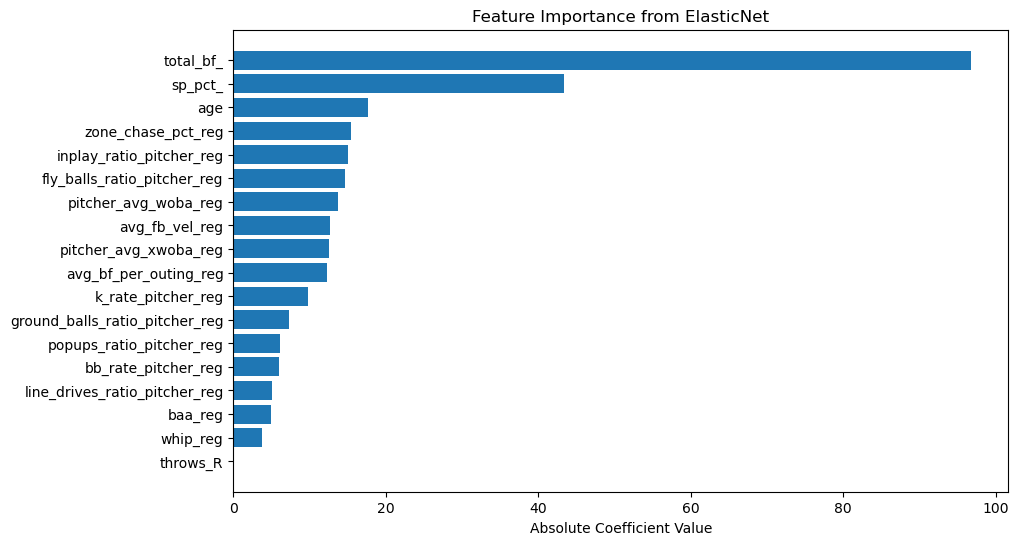

In [283]:
coefficients = elastic_net.coef_

# Create a DataFrame for the coefficients to associate with feature names
# After scaling, the feature names are lost, so we use the columns from X
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Use the original feature names from X
    'Coefficient': coefficients
})

# Sort the features by the absolute value of the coefficients
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Print the feature importance
print(feature_importance)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance from ElasticNet')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()

In [284]:
print("\nActual vs Predicted Values:")
print(pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).head(20))  # Show first 20 rows


Actual vs Predicted Values:
     Actual   Predicted
711    23.0  150.788170
440   466.0  416.941295
525   160.0  109.124530
722    27.0   69.486912
39      0.0  140.590732
290   145.0  254.658855
300     0.0  140.336149
333   163.0    0.000000
208     0.0   37.831357
136    23.0   18.630006
137   116.0  514.449490
723     0.0    9.510030
486     0.0    0.000000
244   121.0  147.067988
344     0.0   43.187328
853    89.0  172.630118
572   273.0  178.745021
655   202.0  157.699918
891   258.0  227.073746
110     0.0   24.303320


In [285]:
df_pitching.loc[741]

total_bf                                0.0
age                                    27.0
throws                                    R
sp_pct_                                 0.0
total_bf_                            24.375
whip_reg                           1.428132
baa_reg                            0.205876
k_rate_pitcher_reg                 0.168777
bb_rate_pitcher_reg                0.100286
inplay_ratio_pitcher_reg           0.170903
fly_balls_ratio_pitcher_reg        1.405737
ground_balls_ratio_pitcher_reg     1.718654
line_drives_ratio_pitcher_reg      1.370923
popups_ratio_pitcher_reg           1.104127
avg_bf_per_outing_reg               4.26138
pitcher_avg_xwoba_reg              0.375342
pitcher_avg_woba_reg               0.378625
zone_chase_pct_reg                 0.584252
avg_fb_vel_reg                    94.739117
Name: 741, dtype: object